In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lightkurve import search_targetpixelfile
from lightkurve import KeplerTargetPixelFile

from photutilspsf.photutilspsf import (wrapper_supplement_olivares_with_gaia_coordinates_on_tpf,
                                       define_iterative_photometry_with_finder)
from photutilspsf.plots import plot_psf_photometry_results, plot_finder_results, plot_psfmodel


In [2]:
from copy import deepcopy
import pickle

In [7]:
#200062524 -- 200062583
EPIC = 200062560
C = 7
index = 256
memberspath = 'data/olivares_members_r147.fit'

TPF = search_targetpixelfile(EPIC).download()
psf_model = pickle.load(open( "data/epsf29.p", "rb" ))
image = TPF.flux[index,:,:]
subimage = image[20:40,20:40]
photometry = define_iterative_photometry_with_finder(image,sigma_psf=.65, group_psf=2., psf_model=psf_model)
result_table =  photometry(image=subimage)
residual_image = photometry.get_residual_image()

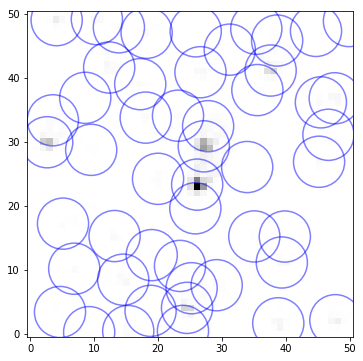

In [8]:
plot_finder_results(photometry, image)

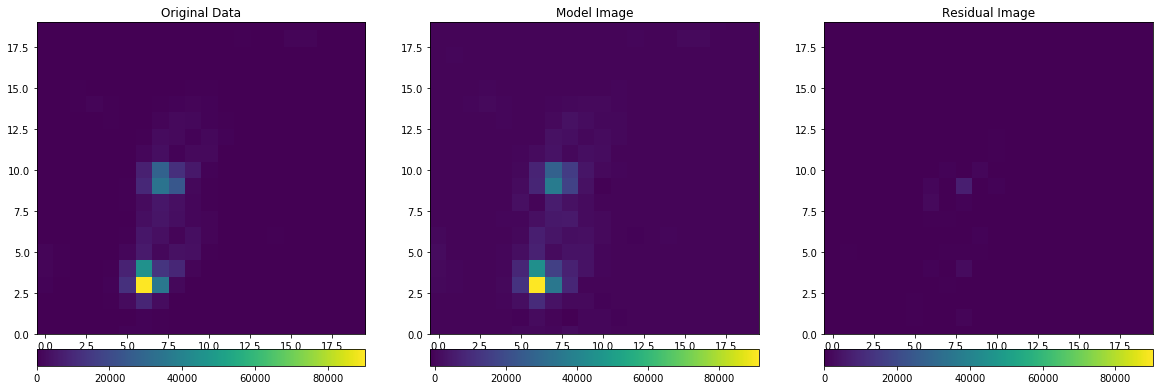

In [10]:
plot_psf_photometry_results(subimage, residual_image)
plt.clim(np.nanmin(subimage), np.nanmax(subimage))

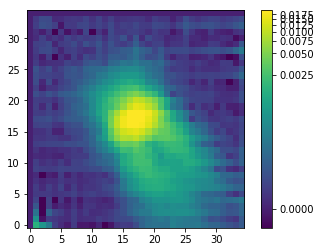

In [6]:
plot_psfmodel(psf_model)